In [1]:
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Does the fft

def spectrum(t,x):
    frequency = np.fft.rfftfreq(len(t),d=t[1]-t[0])
    amplitude = (np.fft.rfft(x)) 
    return frequency, amplitude

In [56]:
# To cut off frequencies with noise

def steplow(cut,freq,amp):
    for i in range(len(amp)):
        if freq[i]<=cut:
            amp[i] = 0
    return amp

def stephigh(cut,freq,amp):
    for i in range(len(amp)):
        if freq[i]>=cut:
            amp[i] = 0
    return amp

In [68]:
def spectrum(t,x):
    frequency = np.fft.rfftfreq(len(t),d=t[1]-t[0])
    amplitude = (np.fft.rfft(x)) 
    return frequency, amplitude

def steplow(cut,freq,amp):
    for i in range(len(amp)):
        if freq[i]<=cut:
            amp[i] = 0
    return amp

def stephigh(cut,freq,amp):
    for i in range(len(amp)):
        if freq[i]>=cut:
            amp[i] = 0
    return amp

def fftplot(filename,stdev=3,title = None,fast = True,zoom = None,cutlow=0,cuthigh=40,enlarge=False):
    fs, data = wavfile.read(str(filename))
    
#   Defining time domain and taking the FFT
    df = fs/len(data) # = 1/T
    if fast == True:
        nfft = 2**16
    else:
        nfft = len(data)-1
    data = data[0:nfft]
    t = np.linspace(0,len(data)/fs,len(data))
    freq, amp = spectrum(t,data)
    amp = steplow(cutlow,freq,amp)
    amp = stephigh(cuthigh,freq,amp)
    
    Y = np.fft.irfft(amp)
    
    if zoom == None:
        cutfreq = freq
        cutamp = amp
        t1 = t
    else:
        cutfreq = freq[0:zoom]
        cutamp = amp[0:zoom]
        t1 = t[0:zoom]

    cutamp = np.abs(cutamp)**2
    
    # Fitting a Gaussian
    wid = 2*(stdev**2)
    wid1  = 100
    cen = freq[np.argmax(cutamp)]
    g = cutamp*np.exp(-((cutfreq - cen)**2)/wid)
    G = np.exp(-(cutfreq - cen)**2/wid)
    G_all = amp*np.exp(-((freq - cen)**2)/wid)
    
    YY = np.fft.irfft(G_all)
#   Plotting the waveform and the correspondng FFT
    fig, ax = plt.subplots(6,1,figsize=(15,25))
    
    if enlarge == True:
        top = 3
        bottom = 2
    else:
        top = 1.5
        bottom = 1
    fig.subplots_adjust(top=top,bottom=bottom)
        
    ax[0].plot(t,data,linewidth=2.5)
    ax[0].set_xlabel('Time (s)',fontsize=15)
    ax[0].set_ylabel('Amplitude',fontsize=15)
    ax[0].set_title('Wave',fontsize=20)
    ax[0].tick_params(axis='both',labelsize=13)

    ax[1].plot(cutfreq,cutamp,linewidth=2.5)
    ax[1].set_ylabel('Amplitude',fontsize=15)
    ax[1].set_xlabel('Frequency (Hz)',fontsize=15)
    ax[1].set_title('Fourier Transform with high frequencies higher than '+str(cuthigh)+' Hz stripped off',fontsize=20)
    ax[1].tick_params(axis='both',labelsize=13)
    
    ax[2].plot(t,Y,linewidth=2.5)
    ax[2].set_xlabel('Time (s)',fontsize=15)
    ax[2].set_ylabel('Amplitude',fontsize=15)
    ax[2].set_title('Wave produced after stripping high frequencies',fontsize=20)
    ax[2].tick_params(axis='both',labelsize=13)
    
    ax[3].plot(t1,G,linewidth=2.5)
    ax[3].set_ylabel('Amplitude',fontsize=20)
    ax[3].set_xlabel('Time domain (s)',fontsize=15)
    ax[3].set_title('Gaussian Distribution',fontsize=20)
    ax[3].tick_params(axis='both',labelsize=13)

    ax[4].plot(cutfreq,g,linewidth=2.5)
    ax[4].set_ylabel('Amplitude',fontsize=15)
    ax[4].set_xlabel('Frequency (Hz)',fontsize=15)
    ax[4].set_title('Fourier Transform With Gaussian fit',fontsize=20)
    ax[4].tick_params(axis='both',labelsize=13)

    ax[5].plot(t,YY,linewidth=2.5)
    ax[5].set_xlabel('Time (s)',fontsize=15)
    ax[5].set_ylabel('Amplitude',fontsize=15)
    ax[5].set_title('Wave produced from Inverse FFT after Gaussian',fontsize=20)
    ax[5].tick_params(axis='both',labelsize=13)

# #    Setting the title
    if title != None:
        fig.suptitle(str(title),fontsize = 20)
        
    return "Peak Frequency at", freq[np.argmax(amp)]

('Peak Frequency at', 2.288783434778452)

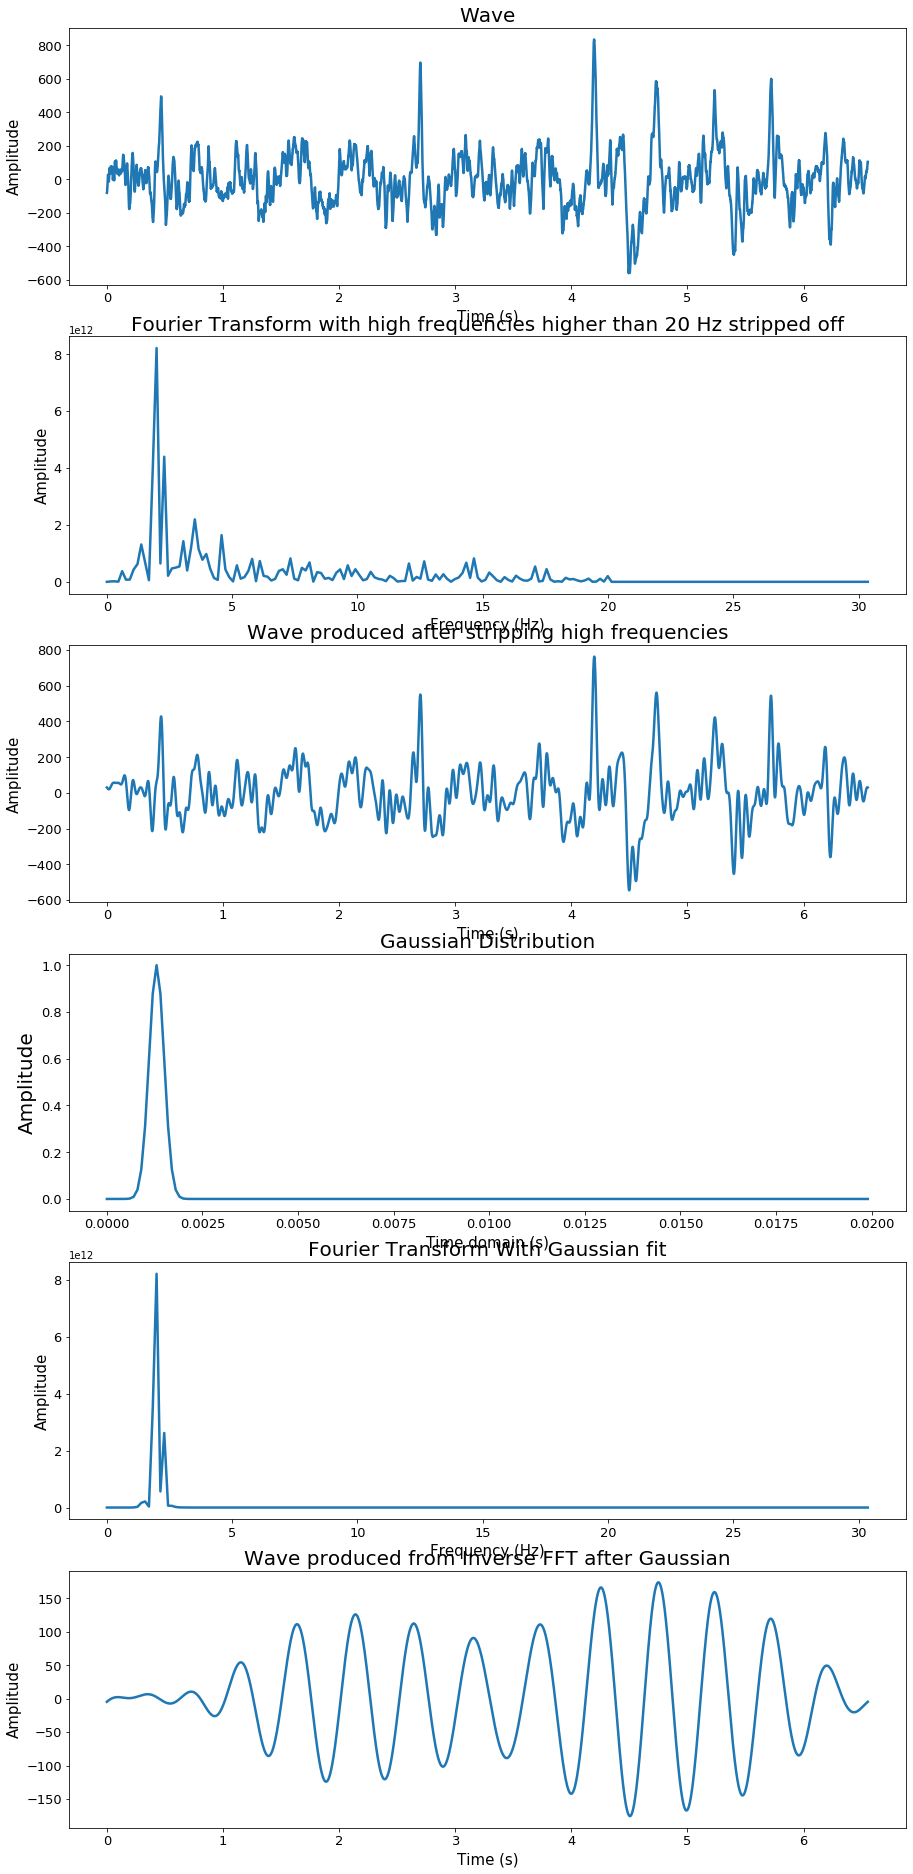

In [74]:
fftplot('0.5s front.wav',stdev=0.3,zoom=200,cuthigh=20,enlarge = True)

('Peak Frequency at', 4.1198101826012135)

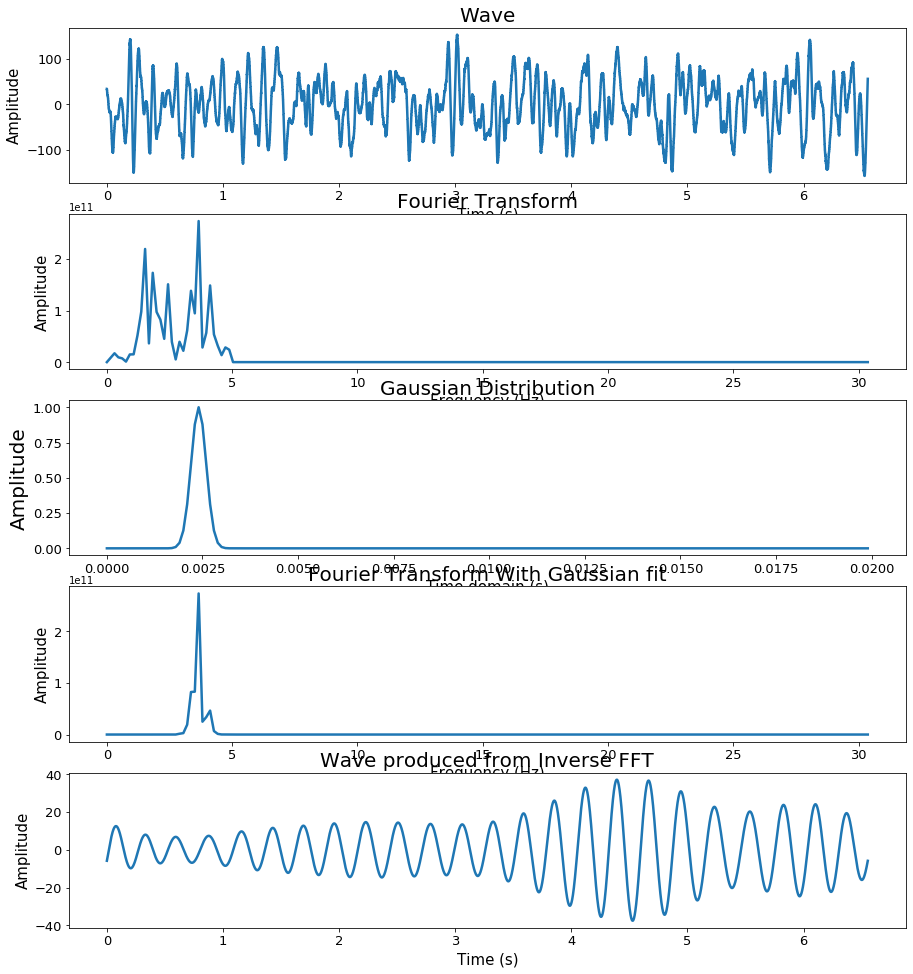

In [47]:
fftplot('as fast as possible back 50.wav',stdev=0.3,zoom=200,cuthigh=5,enlarge=False)